#**Code Python pour la reconnaissance d'objets avec le descripteur SIFT**

#Utiliser l'interface graphique de Colab

In [2]:
from google.colab import drive

# Monter le Drive
drive.mount('/content/drive')

Mounted at /content/drive


#Détection et extraction des points d'intérêt SIFT

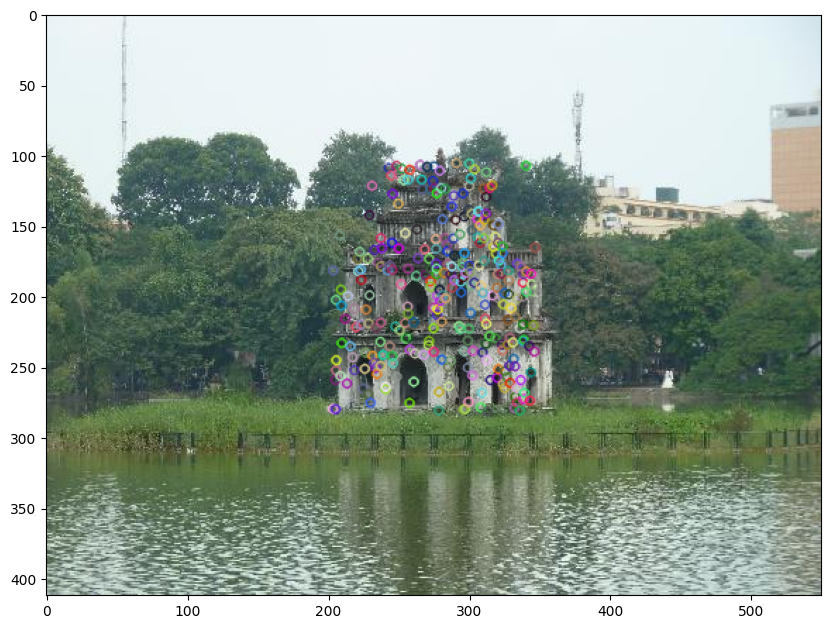

In [3]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image depuis le chemin spécifié
image_path = '/content/drive/MyDrive/COMPUTER_VISION/Image_Recherche/thaprua2.jpg'
image = cv2.imread(image_path)

# Convertir l'image en gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Définir la région d'intérêt (ROI) autour de la maison
# Ces valeurs sont à titre d'exemple, vous devez les ajuster pour votre image spécifique
# x, y sont les coordonnées du coin supérieur gauche de la ROI et w, h sont la largeur et la hauteur
x, y, w, h = 200, 100, 150, 200  # Remplacez ces valeurs par celles correspondant à la maison dans votre image
roi = gray_image[y:y+h, x:x+w]

# Initialiser SIFT
sift = cv2.SIFT_create()

# Détecter les points d'intérêt dans la ROI
keypoints, descriptors = sift.detectAndCompute(roi, None)

# Il faut ajuster les coordonnées des keypoints pour les replacer dans le contexte de l'image originale
for kp in keypoints:
    kp.pt = (kp.pt[0] + x, kp.pt[1] + y)

# Dessiner les points d'intérêt sur l'image originale
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Afficher l'image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.show()


Nombre de keypoints dans l'image : 665


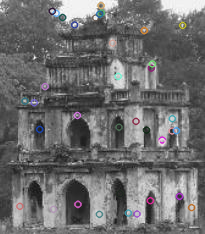

In [21]:
import cv2
from google.colab.patches import cv2_imshow

# Charger l'image
image_path = '/content/drive/MyDrive/COMPUTER_VISION/Objets/thaprua.jpg'
image = cv2.imread(image_path)

# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialiser le détecteur SIFT
sift = cv2.SIFT_create()

# Détecter les keypoints et calculer les descripteurs dans l'image
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Calculer le nombre de keypoints dans l'image
nombre_keypoints = len(keypoints)
print("Nombre de keypoints dans l'image :", nombre_keypoints)

# Trier les keypoints par réponse (force des keypoints)
keypoints = sorted(keypoints, key=lambda x: x.response, reverse=True)

# Prendre les premiers 250 keypoints
keypoints = keypoints[:50]

# Extraire les descripteurs SIFT correspondant aux keypoints
descriptors = descriptors[:50]

# Dessiner les keypoints sur l'image
image_keypoints = cv2.drawKeypoints(gray, keypoints, None)

# Afficher l'image avec les keypoints
cv2_imshow(image_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Mise en correspondance entre deux images avec SIFT**

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10
img1 = cv.imread('/content/drive/MyDrive/COMPUTER_VISION/Objets/thaprua.jpg', cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('/content/drive/MyDrive/COMPUTER_VISION/Image_Recherche/thaprua2.jpg', cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [5]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

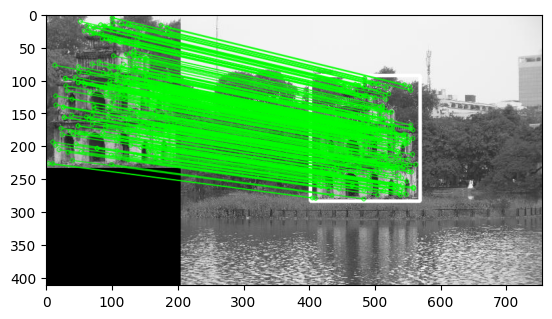

(<matplotlib.image.AxesImage at 0x790acecb7d00>, None)

In [6]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

Mise en correspondance entre deux images avec SIFT

In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 5
img1 = cv.imread('/content/drive/MyDrive/COMPUTER_VISION/Objets/20221206_090528_small.jpg', cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('/content/drive/MyDrive/COMPUTER_VISION/Image_Recherche/20221206_003418_small.jpg', cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good.append(m)

In [8]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

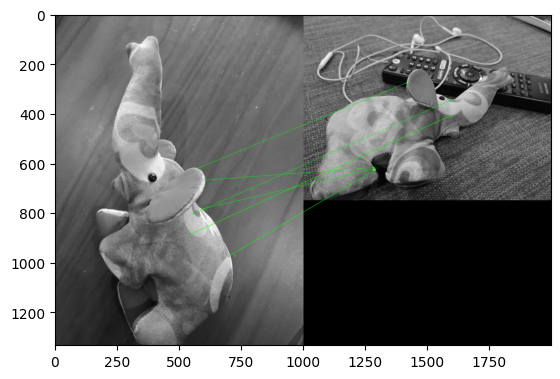

(<matplotlib.image.AxesImage at 0x790ad1297be0>, None)

In [9]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Chemins vers les images sur Google Drive
chemin_image_objet = '/content/drive/MyDrive/COMPUTER_VISION/Objets/20221206_090538_small.jpg'
chemin_image_recherche = '/content/drive/MyDrive/COMPUTER_VISION/Image_Recherche/20221206_003721_small.jpg'

# Chargement des images
image1 = cv2.imread(chemin_image_objet)  # Image contenant l'objet à rechercher
image2 = cv2.imread(chemin_image_recherche)  # Image où rechercher l'objet

# Initialisation de SIFT
sift = cv2.SIFT_create()

# Trouver les points clés et descripteurs SIFT pour les deux images
kp1, des1 = sift.detectAndCompute(image1, None)
kp2, des2 = sift.detectAndCompute(image2, None)

# Création de l'objet BFMatcher et mise en correspondance des descripteurs
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Filtrage des correspondances - Ratio Test
good_matches = []
for m, n in matches:
    if m.distance < 0.85 * n.distance:
        good_matches.append(m)

# Dessin des correspondances
draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=None,
                   flags=2)
img3 = cv2.drawMatches(image1, kp1, image2, kp2, good_matches, None, **draw_params)

# Calcul de l'homographie si suffisamment de correspondances sont trouvées
if len(good_matches) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Calcul de l'homographie
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Utilisation de l'homographie pour projeter les coins de l'objet
    h, w, d = image1.shape
    pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, H)

    # Dessin du polygone sur l'image de recherche
    image2 = cv2.polylines(image2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)
    cv2_imshow(image2)
else:
    print("Pas assez de correspondances ont été trouvées - %d/%d" % (len(good_matches), MIN_MATCH_COUNT))

# Affichage de l'image avec les correspondances
cv2_imshow(img3)


Output hidden; open in https://colab.research.google.com to view.

**Localization d'objets avec SIFT**

In [11]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Chemins vers vos images spécifiques sur Google Drive
chemin_image_objet = '/content/drive/MyDrive/COMPUTER_VISION/Objets/20221206_090548_small.jpg'
chemin_image_recherche = '/content/drive/MyDrive/COMPUTER_VISION/Image_Recherche/20221206_003721_small.jpg'

# Charger les images
image_objet = cv2.imread(chemin_image_objet, cv2.IMREAD_GRAYSCALE)
image_recherche = cv2.imread(chemin_image_recherche, cv2.IMREAD_GRAYSCALE)

# Vérifier si les images ont été chargées correctement
if image_objet is None or image_recherche is None:
    raise ValueError("L'une des images n'a pas pu être chargée. Vérifiez les chemins.")

# Convertir l'image de recherche en couleur pour l'affichage final
image_recherche_color = cv2.cvtColor(image_recherche, cv2.COLOR_GRAY2BGR)

# Créer l'objet SIFT
sift = cv2.SIFT_create()

# Détecter les points d'intérêt et calculer les descripteurs SIFT
kp_objet, des_objet = sift.detectAndCompute(image_objet, None)
kp_recherche, des_recherche = sift.detectAndCompute(image_recherche, None)

# Matcher les descripteurs avec l'algorithme BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_objet, des_recherche, k=2)

# Appliquer le ratio test pour filtrer les correspondances
bonnes_correspondances = []
ratio_threshold = 0.75  # Seuil du ratio pour le test
for m, n in matches:
    if m.distance < ratio_threshold * n.distance:
        bonnes_correspondances.append(m)

# Trouver l'homographie si on a assez de correspondances
MIN_MATCH_COUNT = 10  # Nombre minimal de correspondances pour une homographie robuste
if len(bonnes_correspondances) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp_objet[m.queryIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp_recherche[m.trainIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)

    # Calculer l'homographie avec RANSAC
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    # Obtenir les coins de l'image objet pour dessiner le polygone
    h, w = image_objet.shape
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

    # Projeter les coins dans l'image de recherche
    dst = cv2.perspectiveTransform(pts, M)

    # Dessiner les coins sur l'image de recherche colorée
    image_recherche_color = cv2.polylines(image_recherche_color, [np.int32(dst)], True, (0, 255, 0), 3, cv2.LINE_AA)
else:
    print("Pas assez de correspondances trouvées - {}/{}".format(len(bonnes_correspondances), MIN_MATCH_COUNT))
    matchesMask = None

# Dessiner les correspondances avec un masque pour ne montrer que les bonnes correspondances
draw_params = dict(matchColor=(0, 255, 0),  # Couleur des correspondances
                   singlePointColor=None,
                   matchesMask=matchesMask,  # Masque pour filtrer les correspondances
                   flags=2)

img_correspondance = cv2.drawMatches(image_objet, kp_objet, image_recherche_color, kp_recherche, bonnes_correspondances, None, **draw_params)

# Afficher l'image avec les correspondances et l'objet localisé
cv2_imshow(img_correspondance)


Output hidden; open in https://colab.research.google.com to view.

In [12]:
# Importer les bibliothèques nécessaires
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive


# Chemins vers les images sur Google Drive (remplacez par vos propres chemins)
chemin_image_objet = '/content/drive/MyDrive/COMPUTER_VISION/Objets/20221206_090538_small.jpg'
chemin_image_recherche = '/content/drive/MyDrive/COMPUTER_VISION/Image_Recherche/20221206_003721_small.jpg'

# Charger les images
image_objet = cv2.imread(chemin_image_objet, cv2.IMREAD_GRAYSCALE)
image_recherche = cv2.imread(chemin_image_recherche, cv2.IMREAD_GRAYSCALE)

# Vérifier si les images ont été chargées correctement
if image_objet is None or image_recherche is None:
    raise ValueError("Vérifiez les chemins des images")

# Créer l'objet SIFT
sift = cv2.SIFT_create()

# Détecter les points d'intérêt et calculer les descripteurs SIFT
kp_objet, des_objet = sift.detectAndCompute(image_objet, None)
kp_recherche, des_recherche = sift.detectAndCompute(image_recherche, None)

# Matcher les descripteurs avec l'algorithme BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_objet, des_recherche, k=2)

# Appliquer le ratio test pour filtrer les correspondances avec un seuil plus strict
seuil_ratio = 0.8  # Réduire le seuil pour être plus strict
bonnes_correspondances = [m for m, n in matches if m.distance < seuil_ratio * n.distance]

# Trouver l'homographie si on a assez de correspondances
MIN_MATCH_COUNT = 20  # Augmenter la valeur pour minimiser les fausses correspondances
if len(bonnes_correspondances) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp_objet[m.queryIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp_recherche[m.trainIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)

    # Calculer l'homographie
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Obtenir les coins de l'image objet
    h, w = image_objet.shape
    pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)

    # Projeter les coins dans l'image de recherche
    dst = cv2.perspectiveTransform(pts, M)

    # Dessiner les coins sur l'image de recherche
    image_recherche = cv2.polylines(image_recherche, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

    # Afficher l'image avec les coins dessinés
    cv2_imshow(image_recherche)
else:
    print(f"Pas assez de correspondances trouvées - {len(bonnes_correspondances)}/{MIN_MATCH_COUNT}")

# Dessiner les lignes de correspondance
img_correspondance = cv2.drawMatches(image_objet, kp_objet, image_recherche, kp_recherche, bonnes_correspondances, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Afficher l'image des correspondances
cv2_imshow(img_correspondance)


Output hidden; open in https://colab.research.google.com to view.

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 20
img1 = cv.imread('/content/drive/MyDrive/COMPUTER_VISION/Objets/20221206_090538_small.jpg', cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('/content/drive/MyDrive/COMPUTER_VISION/Image_Recherche/20221206_003721_small.jpg', cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 10)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.85*n.distance:
        good.append(m)

In [14]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

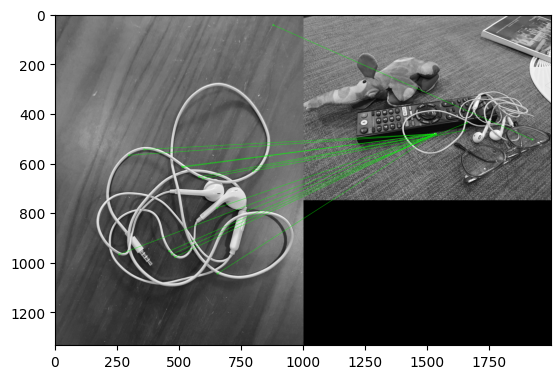

(<matplotlib.image.AxesImage at 0x790aced525f0>, None)

In [15]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

In [35]:
# Importer les bibliothèques nécessaires
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive


# Chemins vers les images sur Google Drive (remplacez par vos propres chemins)
chemin_image_objet = '/content/drive/MyDrive/COMPUTER_VISION/Objets/20221206_090528_small.jpg'
chemin_image_recherche = '/content/drive/MyDrive/COMPUTER_VISION/Image_Recherche/20221206_003418_small.jpg'

# Charger les images
image_objet = cv2.imread(chemin_image_objet, cv2.IMREAD_GRAYSCALE)
image_recherche = cv2.imread(chemin_image_recherche, cv2.IMREAD_GRAYSCALE)

# Vérifier si les images ont été chargées correctement
if image_objet is None or image_recherche is None:
    raise ValueError("Vérifiez les chemins des images")

# Créer l'objet SIFT
sift = cv2.SIFT_create()

# Détecter les points d'intérêt et calculer les descripteurs SIFT
kp_objet, des_objet = sift.detectAndCompute(image_objet, None)
kp_recherche, des_recherche = sift.detectAndCompute(image_recherche, None)

# Matcher les descripteurs avec l'algorithme BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_objet, des_recherche, k=2)

# Appliquer le ratio test pour filtrer les correspondances avec un seuil plus strict
seuil_ratio = 0.70  # Réduire le seuil pour être plus strict
bonnes_correspondances = [m for m, n in matches if m.distance < seuil_ratio * n.distance]

# Trouver l'homographie si on a assez de correspondances
MIN_MATCH_COUNT = 25  # Augmenter la valeur pour minimiser les fausses correspondances
if len(bonnes_correspondances) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp_objet[m.queryIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp_recherche[m.trainIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)

    # Calculer l'homographie
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Obtenir les coins de l'image objet
    h, w = image_objet.shape
    pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)

    # Projeter les coins dans l'image de recherche
    dst = cv2.perspectiveTransform(pts, M)

    # Dessiner les coins sur l'image de recherche
    image_recherche = cv2.polylines(image_recherche, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

    # Afficher l'image avec les coins dessinés
    cv2_imshow(image_recherche)
else:
    print(f"Pas assez de correspondances trouvées - {len(bonnes_correspondances)}/{MIN_MATCH_COUNT}")

# Dessiner les lignes de correspondance
img_correspondance = cv2.drawMatches(image_objet, kp_objet, image_recherche, kp_recherche, bonnes_correspondances, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Afficher l'image des correspondances
cv2_imshow(img_correspondance)


Output hidden; open in https://colab.research.google.com to view.

In [36]:
# Importer les bibliothèques nécessaires
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive


# Chemins vers les images sur Google Drive (remplacez par vos propres chemins)
chemin_image_objet = '/content/drive/MyDrive/COMPUTER_VISION/Objets/20221206_090548_small.jpg'
chemin_image_recherche = '/content/drive/MyDrive/COMPUTER_VISION/Image_Recherche/20221206_003721_small.jpg'

# Charger les images
image_objet = cv2.imread(chemin_image_objet, cv2.IMREAD_GRAYSCALE)
image_recherche = cv2.imread(chemin_image_recherche, cv2.IMREAD_GRAYSCALE)

# Vérifier si les images ont été chargées correctement
if image_objet is None or image_recherche is None:
    raise ValueError("Vérifiez les chemins des images")

# Créer l'objet SIFT
sift = cv2.SIFT_create()

# Détecter les points d'intérêt et calculer les descripteurs SIFT
kp_objet, des_objet = sift.detectAndCompute(image_objet, None)
kp_recherche, des_recherche = sift.detectAndCompute(image_recherche, None)

# Matcher les descripteurs avec l'algorithme BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_objet, des_recherche, k=2)

# Appliquer le ratio test pour filtrer les correspondances avec un seuil plus strict
seuil_ratio = 0.8  # Réduire le seuil pour être plus strict
bonnes_correspondances = [m for m, n in matches if m.distance < seuil_ratio * n.distance]

# Trouver l'homographie si on a assez de correspondances
MIN_MATCH_COUNT = 20  # Augmenter la valeur pour minimiser les fausses correspondances
if len(bonnes_correspondances) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp_objet[m.queryIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp_recherche[m.trainIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)

    # Calculer l'homographie
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Obtenir les coins de l'image objet
    h, w = image_objet.shape
    pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)

    # Projeter les coins dans l'image de recherche
    dst = cv2.perspectiveTransform(pts, M)

    # Dessiner les coins sur l'image de recherche
    image_recherche = cv2.polylines(image_recherche, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

    # Afficher l'image avec les coins dessinés
    cv2_imshow(image_recherche)
else:
    print(f"Pas assez de correspondances trouvées - {len(bonnes_correspondances)}/{MIN_MATCH_COUNT}")

# Dessiner les lignes de correspondance
img_correspondance = cv2.drawMatches(image_objet, kp_objet, image_recherche, kp_recherche, bonnes_correspondances, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Afficher l'image des correspondances
cv2_imshow(img_correspondance)


Output hidden; open in https://colab.research.google.com to view.